In [537]:
import pandas as pd

In [538]:
df = pd.read_csv("./additional/BostonHousingDataset.csv")

In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [540]:
# Так как, в столбце rm имеются пропуски, а мы используем данный столбец в линейной регрессии, заполним их медианным значением.
df['rm'] = df['rm'].fillna(df['rm'].median())

Первоначально возьмём следующие переменные в кач-ве признаков лин.регрессии (на основании корреляции с целевой перем.): lstat, rm, ptratio, indus.

In [541]:
# Инициализируем коэффициенты и свободны член нулями
W = [0.0 for _ in range(4)] # коэффициенты при признаках lstat, rm, ptratio, indus
b = 0.0 # свободный член

In [542]:
# Функция, вычисляющая y-predict
def predict(x, W, b):
    # x = [lstat, rm, ptratio, indus]
    return sum(W[i] * x[i] for i in range(4)) + b

In [543]:
# Функция для вычисления MSE
def calculate_MSE (y_pred_col, y_fact_col):
    y_pred = list(y_pred_col)
    y_fact = list(y_fact_col)

    error_sum = 0.0
    for pred, fact in zip(y_pred, y_fact):
        error_sum += (fact - pred) ** 2

    mse = error_sum / len(y_pred)
    return mse   

In [544]:
# Нормализация признаков: lstat, rm, ptratio, indus
# (метод стандартизация: насколько каждое значение отклоняется от среднего в единицах ст.отклонения)
features = ['lstat', 'rm', 'ptratio', 'indus']

for col in features:
    mean = df[col].mean()
    std = df[col].std()
    df[col] = (df[col] - mean) / std

X = df[features].values.tolist()
Y = df['medv'].values.tolist()

In [545]:
# Градиентный спуск

learning_rate = 0.01
epochs = 2000
n = len(X)

for epoch in range(epochs):
    # Инициализация производных
    dW = [0.0 for _ in range(4)]
    db = 0.0

    for xi, yi in zip(X, Y):
        y_pred = predict(xi, W, b)
        error = y_pred - yi

        # Производные MSE по каждому параметру W[i]
        for i in range(4):
            dW[i] += (2 / n) * error * xi[i]

        # Производная MSE по свободному члену b
        db += (2 / n) * error

    # Обновление параметров модели
    for i in range(4):
        W[i] -= learning_rate * dW[i]
    b -= learning_rate * db

    # Каждые 100 циклов выводим MSE
    if epoch % 100 == 0:
        y_preds = [predict(xi, W, b) for xi in X]
        mse = calculate_MSE(y_preds, Y)
        print(f"Epoch {epoch}: MSE = {mse:.4f}")
    

Epoch 0: MSE = 567.0385
Epoch 100: MSE = 36.2898
Epoch 200: MSE = 27.4005
Epoch 300: MSE = 27.1699
Epoch 400: MSE = 27.1478
Epoch 500: MSE = 27.1425
Epoch 600: MSE = 27.1411
Epoch 700: MSE = 27.1406
Epoch 800: MSE = 27.1405
Epoch 900: MSE = 27.1405
Epoch 1000: MSE = 27.1405
Epoch 1100: MSE = 27.1405
Epoch 1200: MSE = 27.1405
Epoch 1300: MSE = 27.1405
Epoch 1400: MSE = 27.1405
Epoch 1500: MSE = 27.1405
Epoch 1600: MSE = 27.1405
Epoch 1700: MSE = 27.1405
Epoch 1800: MSE = 27.1405
Epoch 1900: MSE = 27.1405


In [547]:
# Итоговые коэффициенты и ошибка
final_preds = [predict(xi, W, b) for xi in X]
final_mse = calculate_MSE(final_preds, Y)

print(f"Коэффициенты W: {[round(w, 4) for w in W]}")
print(f"Свободный член b: {round(b, 4)}")
print(f"Финальная MSE: {round(final_mse, 4)}")

Коэффициенты W: [-4.1075, 3.1723, -2.0227, 0.0489]
Свободный член b: 22.5328
Финальная MSE: 27.1405


In [548]:
# Готовое решение от scikit-learn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [549]:
import numpy as np

X_np = np.array(X)
Y_np = np.array(Y)

In [550]:
# Обучение модели
model = LinearRegression()
model.fit(X_np, Y_np)

LinearRegression()

In [551]:
sklearn_preds = model.predict(X_np)
sklearn_mse = mean_squared_error(Y_np, sklearn_preds)

print("\nСравнение с sklearn.LinearRegression")
print(f"Коэффициенты W: {[round(w, 4) for w in model.coef_]}")
print(f"Свободный член b: {round(model.intercept_, 4)}")
print(f"MSE: {round(sklearn_mse, 4)}")


Сравнение с sklearn.LinearRegression
Коэффициенты W: [np.float64(-4.1075), np.float64(3.1723), np.float64(-2.0227), np.float64(0.0489)]
Свободный член b: 22.5328
MSE: 27.1405


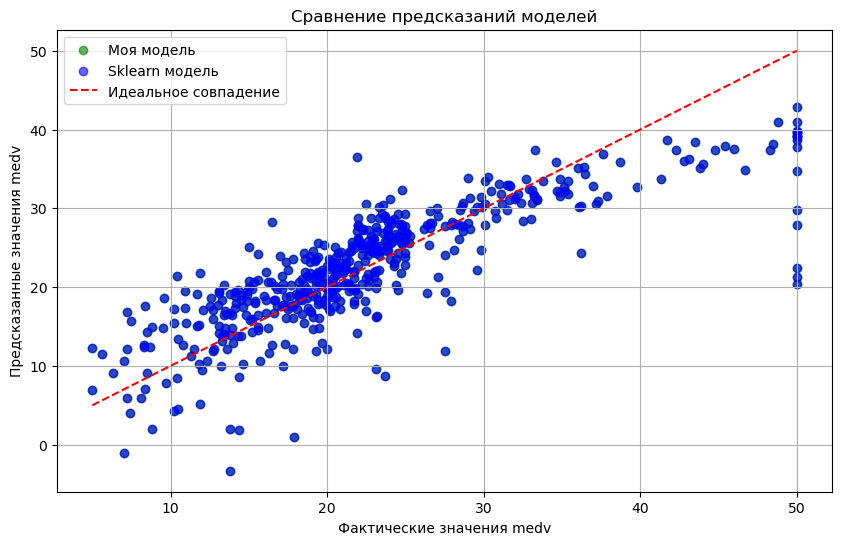

In [553]:
# График, отражающий точность предсказаний
import matplotlib.pyplot as plt

# Реальные значения
y_true = df['medv'].values

# Предсказания твоей модели
y_pred_custom = final_preds

# Предсказания sklearn
y_pred_sklearn = sklearn_preds

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred_custom, alpha=0.6, label='Моя модель', color='green')
plt.scatter(y_true, y_pred_sklearn, alpha=0.6, label='Sklearn модель', color='blue')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Идеальное совпадение')

plt.xlabel("Фактические значения medv")
plt.ylabel("Предсказанные значения medv")
plt.title("Сравнение предсказаний моделей")
plt.legend()
plt.grid(True)
plt.show()

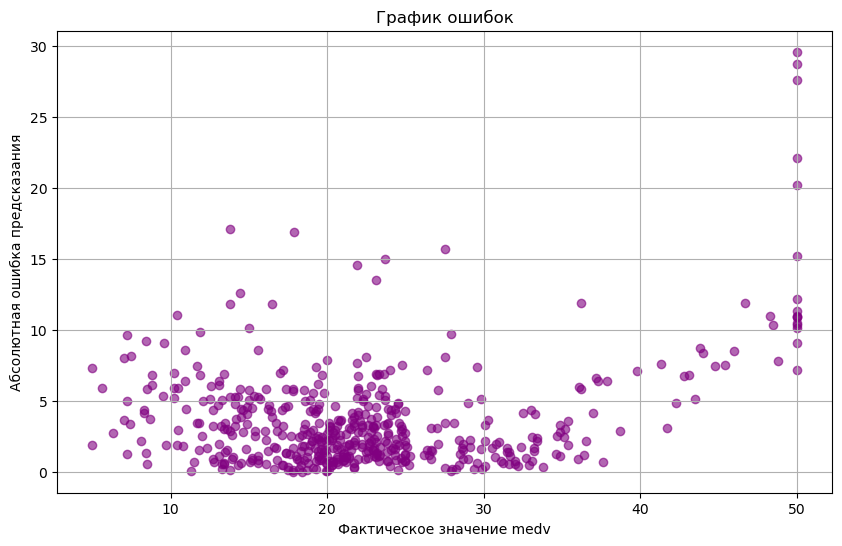

In [557]:
# Ошибка для каждого примера
errors = [abs(y_true - y_pred) for y_true, y_pred in zip(Y, y_pred_custom)]

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(Y, errors, alpha=0.6, color='purple')
plt.xlabel("Фактическое значение medv")
plt.ylabel("Абсолютная ошибка предсказания")
plt.title("График ошибок")
plt.grid(True)
plt.show()

Как видим, модель справляется с дорогими домами и очень дешёвыми гораздо хуже. Такие значения medv являются выбросами (видно на боксплоте хорошо), поэтому модели трудно построить корректное предсказание в этих точках. Особенно плохо у модели с предсказаниями там, где реальные значения medv находятся близко к 50. В описании датасета есть упоминание о том, что значеие 50 - некий искусственный потолок, не отражающий реальную ценовую картину, потому эти данные не очень хорошо влияют на обучение модели.